<a href="https://colab.research.google.com/github/luciaemiliaeu/Nootebooks-Alura/blob/main/Machine_Learning_Sistema_de_recomenda%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

##Datasets

In [2]:
url_filmes = 'https://raw.githubusercontent.com/luciaemiliaeu/Nootebooks-Alura/main/movies.csv'
df_filmes = pd.read_csv(url_filmes)
df_filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
url_rates = 'https://raw.githubusercontent.com/luciaemiliaeu/Nootebooks-Alura/main/ratings.csv'
df_rates = pd.read_csv(url_rates)
df_rates.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
df_rates.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


- As notas (*rates*) variam  entre 0 e 5, mas a menor nota dada é de 0.5.
- A nota média é de 3.5


## Sistemas de Recomendação

### Avaliação dos filmes: Ponderando nota média e total de voltos


In [5]:
nota_media = df_rates.groupby('movieId').mean()['rating']
nota_media.rename('avg rating', inplace=True)

df_filmes = df_filmes.merge(nota_media, how='left', left_on='movieId', right_index=True)

In [6]:
total_votos = df_rates.groupby('movieId').count()['rating']
total_votos.rename('total votes', inplace=True)

df_filmes = df_filmes.merge(total_votos, how='left', left_on='movieId', right_index=True)

In [7]:
df_filmes.sort_values(by=['avg rating', 'total votes'], ascending = [False, False]).head(10)

,movieId,title,genres,avg rating,total votes
48,53,Lamerica (1994),Adventure|Drama,5.0,2.0
87,99,Heidi Fleiss: Hollywood Madam (1995),Documentary,5.0,2.0
870,1151,Lesson Faust (1994),Animation|Comedy|Drama|Fantasy,5.0,2.0
2597,3473,Jonah Who Will Be 25 in the Year 2000 (Jonas q...,Comedy,5.0,2.0
4390,6442,Belle époque (1992),Comedy|Romance,5.0,2.0
4590,6818,Come and See (Idi i smotri) (1985),Drama|War,5.0,2.0
7364,78836,Enter the Void (2009),Drama,5.0,2.0
121,148,"Awfully Big Adventure, An (1995)",Drama,5.0,1.0
405,467,Live Nude Girls (1995),Comedy,5.0,1.0
432,495,In the Realm of the Senses (Ai no corrida) (1976),Drama,5.0,1.0


In [8]:
df_filmes = df_filmes[df_filmes['total votes']>50]
df_filmes.sort_values(by=['avg rating', 'total votes'], ascending = [False, False]).head(10)

,movieId,title,genres,avg rating,total votes
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317.0
659,858,"Godfather, The (1972)",Crime|Drama,4.289062,192.0
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.272936,218.0
975,1276,Cool Hand Luke (1967),Drama,4.271930,57.0
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,4.268041,97.0
686,904,Rear Window (1954),Mystery|Thriller,4.261905,84.0
922,1221,"Godfather: Part II, The (1974)",Crime|Drama,4.259690,129.0
6315,48516,"Departed, The (2006)",Crime|Drama|Thriller,4.252336,107.0
914,1213,Goodfellas (1990),Crime|Drama,4.250000,126.0
694,912,Casablanca (1942),Drama|Romance,4.240000,100.0


### Definindo os usuários pela nota média para cada categoria

In [9]:
users_categories = (df_rates.
                    merge(df_filmes, how='inner',left_on='movieId', right_on='movieId')
                  )[['userId', 'movieId', 'genres', 'rating']]
users_categories

,userId,movieId,genres,rating
0,1,1,Adventure|Animation|Children|Comedy|Fantasy,4.0
1,5,1,Adventure|Animation|Children|Comedy|Fantasy,4.0
2,7,1,Adventure|Animation|Children|Comedy|Fantasy,4.5
3,15,1,Adventure|Animation|Children|Comedy|Fantasy,2.5
4,17,1,Adventure|Animation|Children|Comedy|Fantasy,4.5
...,...,...,...,...
40655,603,1997,Horror|Mystery,4.0
40656,606,1997,Horror|Mystery,3.0
40657,607,1997,Horror|Mystery,5.0
40658,608,1997,Horror|Mystery,4.5


In [10]:
generos_dummies = users_categories['genres'].str.get_dummies().astype(float)

def teste(x):
  x.values[x!=0] = users_categories.loc[x[x!=0].index,'rating']
  return x
generos_dummies.apply(lambda x: teste(x), axis=0)

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,4.5,4.5,4.5,4.5,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,2.5,2.5,2.5,2.5,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,4.5,4.5,4.5,4.5,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
40656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
40657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
40658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0


In [11]:
users_categories = (users_categories.
                    merge(generos_dummies, how='inner', 
                           left_index=True, right_index=True).
                    drop(['genres', 'rating'], axis=1).
                    replace(0, np.NaN).
                    dropna(axis=1, how='all'))
users_categories

,userId,movieId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,NaN,4.0,4.0,4.0,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,1,NaN,4.0,4.0,4.0,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,1,NaN,4.5,4.5,4.5,4.5,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15,1,NaN,2.5,2.5,2.5,2.5,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17,1,NaN,4.5,4.5,4.5,4.5,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40655,603,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
40656,606,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
40657,607,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
40658,608,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN


In [12]:
df_users = (users_categories.
            groupby('userId').
            mean().
            drop('movieId', axis=1).
            fillna(0))
df_users

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,
1,4.254902,4.307692,4.571429,4.636364,4.306122,4.407407,0.0,4.500000,4.409091,5.00,3.000000,0.000000,4.750000,4.750000,4.230769,4.214286,4.242424,4.285714,4.600000
2,3.875000,3.750000,0.000000,0.000000,4.000000,4.000000,0.0,4.100000,0.000000,0.00,3.000000,3.750000,0.000000,4.000000,4.500000,3.500000,4.000000,4.500000,3.500000
3,0.000000,0.000000,0.500000,0.500000,0.500000,0.000000,0.0,0.500000,0.500000,0.00,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000
4,3.368421,3.700000,4.250000,4.285714,3.425000,3.625000,0.0,3.258065,3.916667,2.00,4.333333,3.000000,3.857143,2.888889,3.157895,2.500000,3.062500,1.000000,3.000000
5,3.111111,3.250000,4.333333,4.125000,3.307692,3.600000,0.0,3.600000,4.333333,0.00,3.000000,3.666667,4.400000,4.000000,2.666667,2.500000,3.555556,3.333333,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.543478,3.592857,3.694444,3.645833,3.553571,3.965909,4.0,3.872642,3.636364,3.75,3.678571,3.208333,3.666667,3.833333,3.726415,3.625000,3.768519,4.041667,3.375000
607,3.770833,3.516129,3.250000,3.625000,3.448276,3.850000,0.0,4.085714,3.454545,0.00,4.083333,5.000000,4.000000,4.800000,3.666667,3.428571,4.000000,5.000000,4.000000
608,3.439130,3.303371,2.916667,2.632353,3.077236,3.745902,3.5,3.470874,3.125000,4.00,3.595238,3.900000,2.562500,3.937500,2.923077,3.419118,3.620482,3.636364,2.714286


Escalonando os dados

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
users_escalados = scaler.fit_transform(df_users)

Visualizando os usuários

In [15]:
from sklearn.manifold import TSNE


In [16]:
tsne = TSNE()
data_users = tsne.fit_transform(users_escalados)

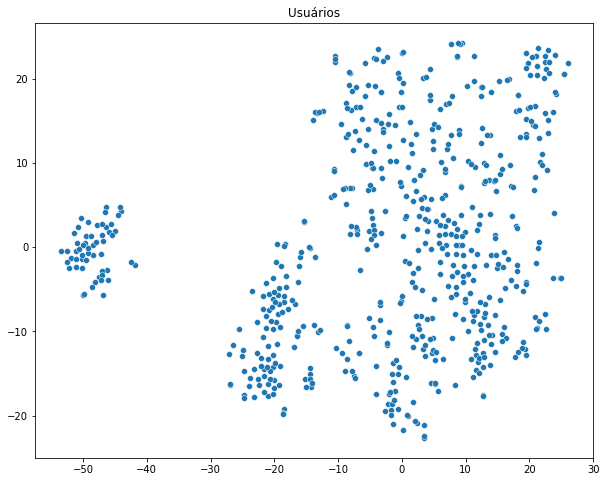

In [17]:
fig=plt.figure(figsize=(10,8))
sns.scatterplot(x = data_users[:,0], y= data_users[:,1])
plt.title('Usuários')
plt.show()

###Agrupando os usuários

In [18]:
from sklearn.cluster import KMeans

In [19]:
def kmeans_k_test(k, x):
  modelo = KMeans(n_clusters= k)
  modelo.fit(x)
  return modelo.inertia_

K = np.arange(2,50)
resultados = [[k, kmeans_k_test(k, users_escalados)] for k in K]
df_resultados_kmeans = pd.DataFrame(resultados, columns=['K', 'Inertia'])

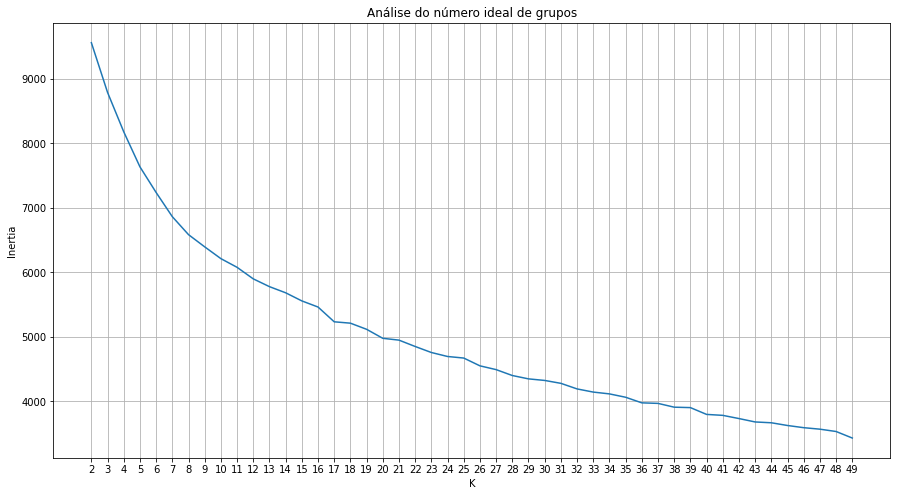

In [20]:
fig=plt.figure(figsize=(15,8))
sns.lineplot(x='K', y='Inertia', data=df_resultados_kmeans)
plt.title('Análise do número ideal de grupos')
plt.grid()
plt.xticks(K)
plt.show()

In [21]:
modelo_kmeans = KMeans(20, init='k-means++')
clusters = modelo_kmeans.fit(users_escalados).labels_
centroides= modelo_kmeans.cluster_centers_

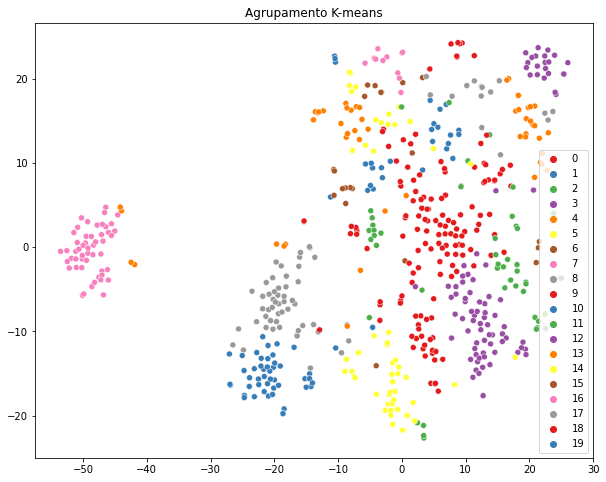

In [22]:
fig=plt.figure(figsize=(10,8))
sns.scatterplot(x = data_users[:,0], y= data_users[:,1],
                hue=clusters,
                palette=sns.color_palette('Set1', 20))
plt.title('Agrupamento K-means')
plt.show()

Analisando os centroides

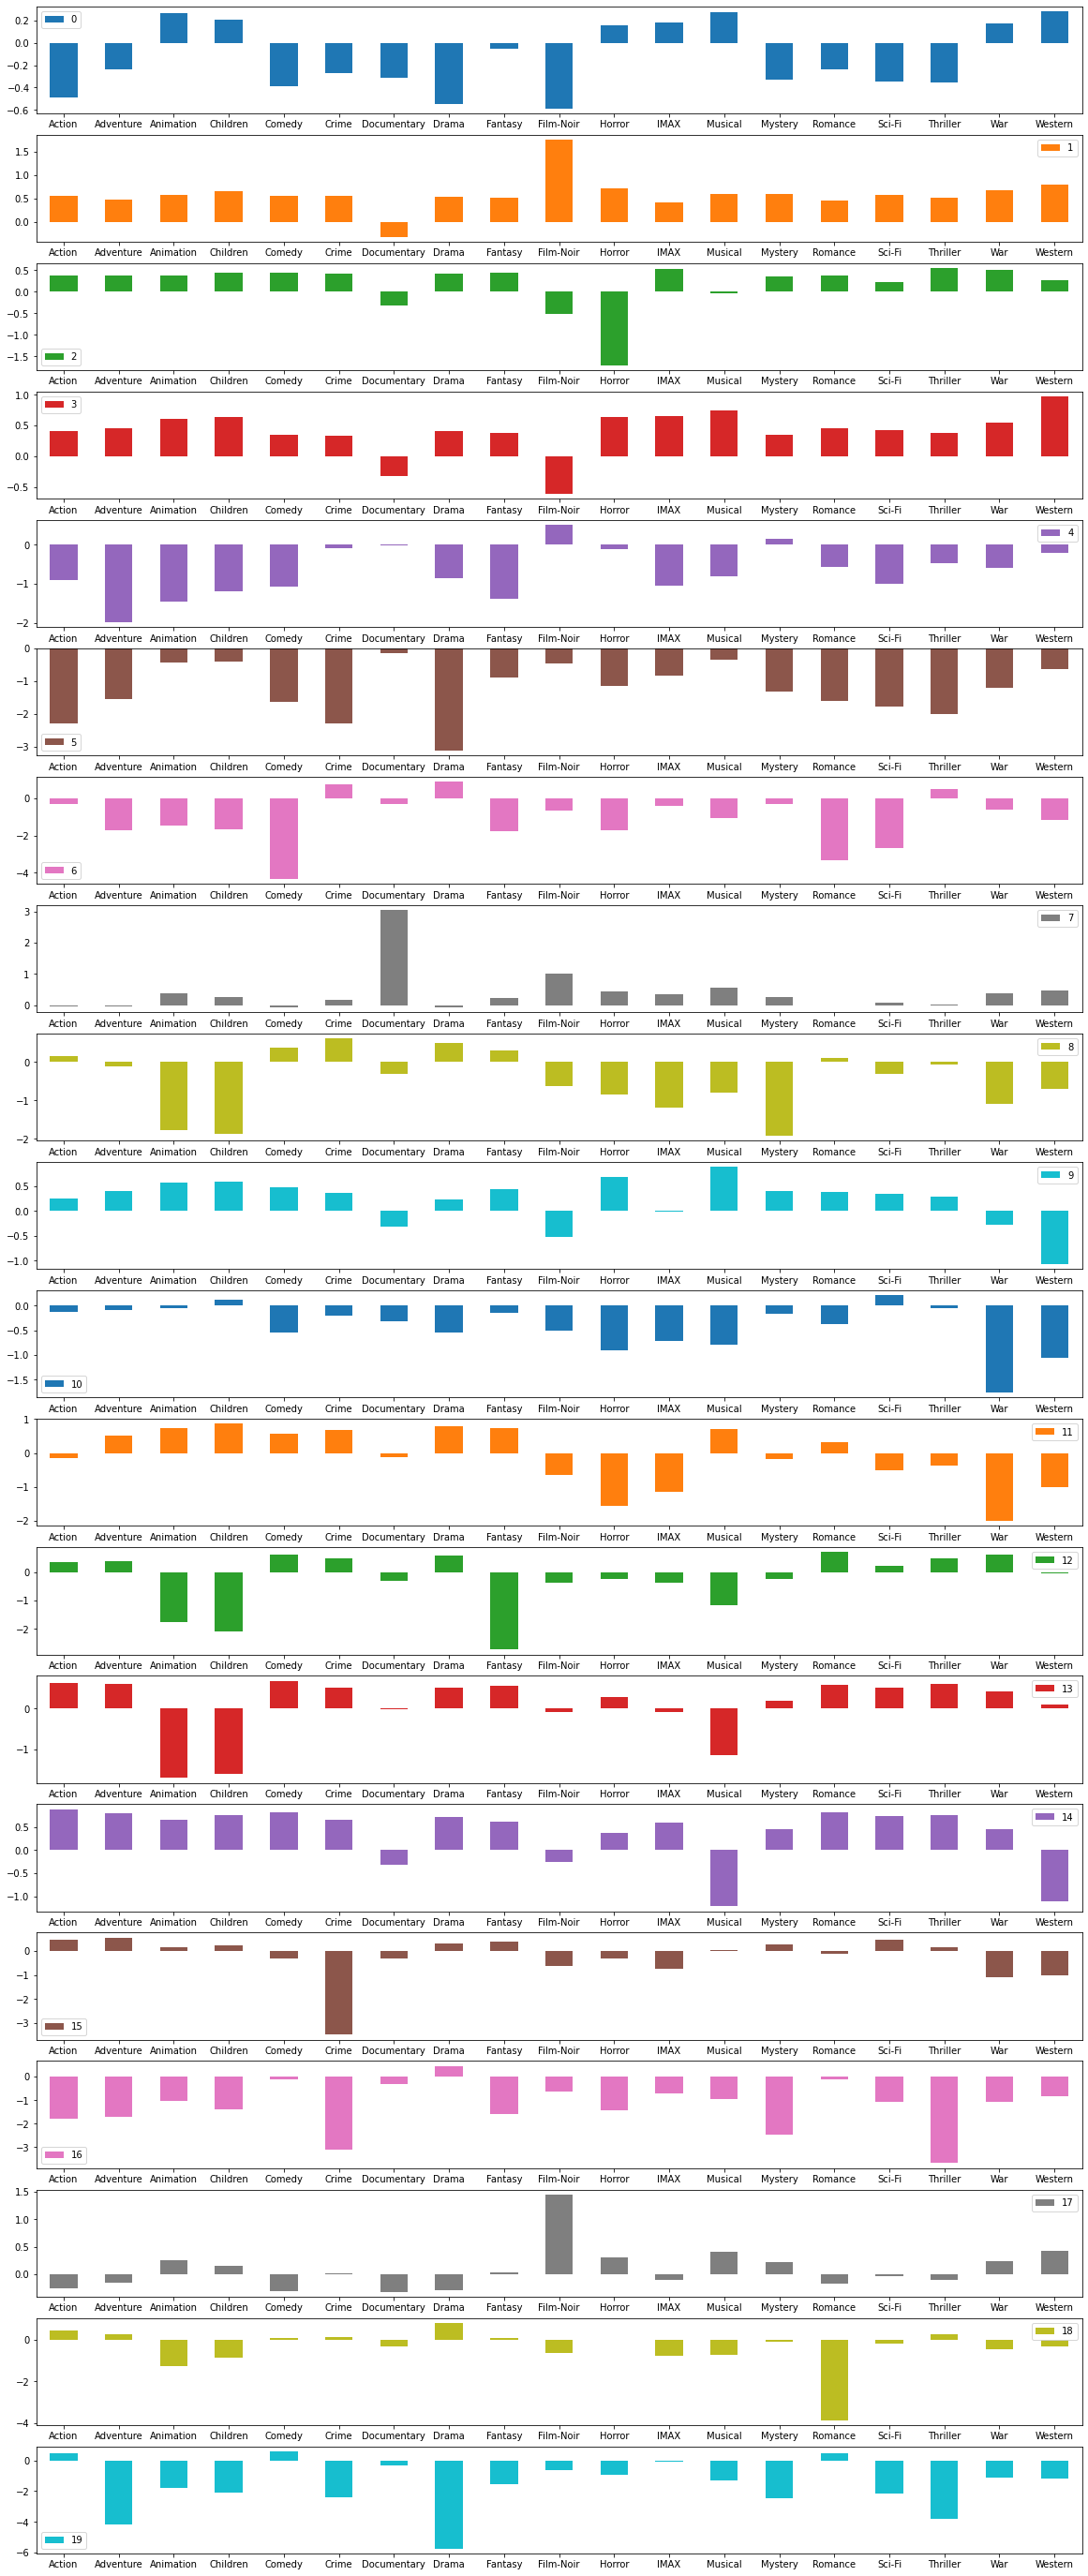

In [23]:
df_centroides = pd.DataFrame(centroides, columns= df_users.columns)
df_centroides.transpose().plot.bar(title =['']*(df_centroides.shape[1]+1), 
                                  subplots=True, sharex=False, 
                                  rot=0, figsize=(20, 50))
plt.show()

In [24]:
df_users['Cluster'] = clusters

### Sugerindo filmes com base nos grupos

Sugerindo os filmes mais bem avaliados pelos usuários de mesmo grupo

In [25]:

def teste(x):
  x.values[x!=0] = user.loc[x[x!=0].index,'rating']
  return x

def recomendar(user): 
  my_movies = user['movieId'].values
  #print(my_movies)
  
  user = (user.
          merge(df_filmes, how='inner',
                left_on='movieId', 
                right_on='movieId')
  )

  generos_user = user['genres'].str.get_dummies().astype(float)
  generos_user.apply(lambda x: teste(x), axis=0)
  
  user = (user.merge(generos_user, how='inner',
            left_index=True, right_index=True).
          set_index('userId').
          drop([ 'movieId', 'rating', 'timestamp',
                'avg rating', 'total votes'], axis=1).
          replace(0, np.NaN).
          dropna(axis=1, how='all').
          mean().
          fillna(0))
  print(user.sort_values())

  default_user = pd.Series(dict(zip(df_users.columns[:-1], [0]*(len(df_users.columns)-1)))).astype(float)
  default_user.update(user.to_dict())
  user = scaler.transform(default_user.values.reshape(1, -1))
  #print(user)

  cluster = modelo_kmeans.predict(user)
  print(cluster)

  friends = df_users[df_users['Cluster']==cluster[0]].index.values
  #print(friends)

  filmes_assistidos = (df_rates[(df_rates['userId'].isin(friends)) &
                                ~(df_rates['movieId'].isin(my_movies))]['movieId'])
  #print(filmes_assistidos)

  recomendacoes = (df_filmes[df_filmes['movieId'].isin(filmes_assistidos)].
                sort_values(by=['avg rating', 'total votes'], ascending=False)).head(10)
  
  #print(recomendacoes)
  return recomendacoes

user = df_rates[df_rates['userId']==600].reset_index()
recomendar(user)


IMAX               2.272727
War                2.388889
Horror             2.558824
Western            2.625000
Musical            2.638889
Adventure          2.750000
Drama              2.780899
Sci-Fi             2.781818
Romance            2.830189
Fantasy            2.867925
Action             2.875000
Thriller           2.879032
Animation          2.928571
Comedy             2.981651
Children           3.088235
Crime              3.154762
Mystery            3.156250
Film-Noir          4.000000
Documentary        4.000000
index          95413.709804
dtype: float64
[7]


,movieId,title,genres,avg rating,total votes
975,1276,Cool Hand Luke (1967),Drama,4.271930,57.0
686,904,Rear Window (1954),Mystery|Thriller,4.261905,84.0
922,1221,"Godfather: Part II, The (1974)",Crime|Drama,4.259690,129.0
6315,48516,"Departed, The (2006)",Crime|Drama|Thriller,4.252336,107.0
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.237745,204.0
909,1208,Apocalypse Now (1979),Action|Drama|War,4.219626,107.0
951,1252,Chinatown (1974),Crime|Film-Noir|Mystery|Thriller,4.211864,59.0
896,1193,One Flew Over the Cuckoo's Nest (1975),Drama,4.203008,133.0
828,1089,Reservoir Dogs (1992),Crime|Mystery|Thriller,4.202290,131.0
926,1225,Amadeus (1984),Drama,4.184211,76.0


###Filtrando sugestões 

In [26]:
def teste(x):
  x.values[x!=0] = user.loc[x[x!=0].index,'rating']
  return x

def get_cluster(user): 
  my_movies = user['movieId'].values
  #print(my_movies)
  
  user = (user.
          merge(df_filmes, how='inner',
                left_on='movieId', 
                right_on='movieId')
  )

  generos_user = user['genres'].str.get_dummies().astype(float)
  generos_user.apply(lambda x: teste(x), axis=0)
  
  user = (user.merge(generos_user, how='inner',
            left_index=True, right_index=True).
          set_index('userId').
          drop([ 'movieId', 'rating', 'timestamp',
                'avg rating', 'total votes'], axis=1).
          replace(0, np.NaN).
          dropna(axis=1, how='all').
          mean().
          fillna(0))
  #print(user.sort_values())

  default_user = pd.Series(dict(zip(df_users.columns[:-1], [0]*(len(df_users.columns)-1)))).astype(float)
  default_user.update(user.to_dict())
  user = scaler.transform(default_user.values.reshape(1, -1))
  #print(user)

  cluster = modelo_kmeans.predict(user)
  #print(cluster)
  friends = df_users[df_users['Cluster']==cluster[0]].index.values
  return df_rates[df_rates['userId'].isin(friends)], user

user = df_rates[df_rates['userId']==600].reset_index()
cluster_sample, user = get_cluster(user)
cluster_sample

,userId,movieId,rating,timestamp
1772,18,1,3.5,1455209816
1773,18,2,3.0,1455617462
1774,18,6,4.0,1460138360
1775,18,16,4.5,1461311583
1776,18,32,4.0,1455209840
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [27]:
filmes_dummies = pd.get_dummies(cluster_sample['movieId'])
filmes_dummies.values[filmes_dummies!=0] = cluster_sample['rating']
filmes_dummies = filmes_dummies.merge(cluster_sample['userId'], how='inner', left_index=True, 
                     right_index=True)
filmes_dummies = filmes_dummies.groupby('userId').sum()
filmes_dummies 

,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,31,32,34,36,38,39,41,42,43,44,45,46,...,176751,177593,177615,177765,178061,178129,179053,179073,179135,179813,179817,179819,180031,180045,180095,180297,180497,180777,180985,181315,182715,183199,183301,183317,183897,184245,184721,184791,185135,187593,187595,187717,188189,188301,188675,188833,189381,189713,190183,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,3,3,0,0,0,4,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,4,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,4,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,3,0
52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63,5,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64,4,0,3,0,0,4,0,0,0,0,0,0,0,0,5,0,0,3,0,0,3,0,0,3,0,0,0,0,0,4,4,4,0,4,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68,2,2,2,0,2,4,2,0,0,4,4,0,0,0,3,3,2,1,0,0,0,0,0,3,3,0,0,0,3,0,1,0,0,4,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
82,2,3,0,0,0,3,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
from sklearn.neighbors import NearestNeighbors

In [29]:
nbrs = NearestNeighbors(n_neighbors=8, algorithm='ball_tree').fit()
distances, indices = nbrs.kneighbors(user)

TypeError: ignored

In [ ]:
distances[0], indices[0]